# Game of Trackers

This notebook runs an agent-based simulation of ExposureNotification enabled devices in varying clusters and beacon proximity.

It runs a variety of parametric variations:

* Per spec
* Live Android code on Galaxy S10
* Live Android R code (untested)
* Fixed Android R code (wontfix atm)
* Fixed per spec

The simulation provides measurements for triangulated beacon setups (three or more with full coverage) with moving agents or non-triangulated setups (single beacon) with static agents.

The following scenarios are supported by the tracking solver:

* 100% recovery: MAC rotates but RPI stays the same
* 100% recovery: RPI rotates but MAC stays the same (Live Android is not affected by this)
* <100% recovery: temporal uniqueness: no close secondary rotations make occurence temporally unique
* <100% recovery: spatial uniqueness: no nearby secondary rotations make occurence spatially unique

The reference data is synthesized but the solver technology can be easily attached to real-world log datasets for live tracking.

1/10
2/10
3/10
4/10
5/10
6/10
7/10
8/10
9/10
10/10


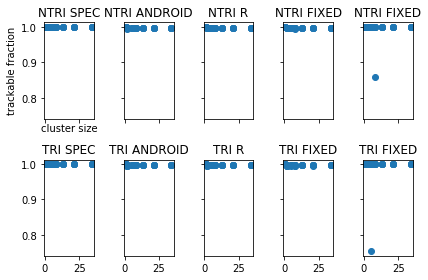

In [1]:
import gameoftrackers as got
import matplotlib.pyplot as plt
import numpy as np
import math
import pprint
from gameoftrackers import TimeSeriesData, ExposureNotificationTimers, ExposureNotificationTimerTypes, SIMULATION_RUN_STEPS, DeviceOwnerAgent, run_game, render_game, Map, action_list

n_types = len(list(ExposureNotificationTimerTypes))
n_total = n_types * 2
n_simulation_runs = 5
i_total = 0

fig, ax = plt.subplots(2, n_types, sharex='all', sharey='all')

for timer_type in ExposureNotificationTimerTypes:
    for triangulated in [False, True]:
        trackables = []

        # stats = {}
        WANT_CLUSTER = [1, 2, 5, 8, 13, 21, 34]
        for cluster_size in WANT_CLUSTER: #range(0, max_cluster, CLUSTER_STEP):

            trackables += [run_game(
                n_simulation_runs=n_simulation_runs,
                cluster_size=cluster_size,
                triangulated=triangulated,
                timer_type=timer_type
            )]

            # for action in action_list:
            #     if not action[1] in stats:
            #         stats[action[1]] = 0
            #     stats[action[1]] += 1

        axx = i_total % 2
        axy = timer_type.value - 1
        cax = ax[axx][axy]
        cax.cla()

        timer_name = timer_type.name
        timer_name = timer_name.replace('_FIXED', ' FIX')
        cax.set_title("{} {}".format(
            'TRI' if triangulated else 'NTRI',
            timer_type.name[timer_type.name.rfind('_') + 1:]
        ))

        data = np.array([
            [WANT_CLUSTER[i], t]
            for i in range(len(trackables))
            for t in trackables[i]
        ])
        x = data[:,0]
        y = data[:,1]

        cax.scatter(x=x, y=y)
        if axx == 0 and axy == 0:
            cax.set_xlabel('cluster size')
            cax.set_ylabel('trackable fraction')

        i_total += 1
        print(f"{i_total}/{n_total}")
        # pprint.pprint(stats)

fig.tight_layout()
plt.show()